In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [125]:
hus  = pd.read_excel (r'data/hus_gbg.xlsx', header=2, sheet_name=1)
bstd = pd.read_excel (r'data/bostadsratt_gbg.xlsx', header=2, sheet_name=1)

hus.set_index('År', inplace=True)
bstd.set_index('År', inplace=True)

hus = pd.DataFrame(hus.astype(str).replace(',', '.',regex=True)).astype(float)

In [126]:
df = pd.merge(hus, bstd, left_index=True, right_index=True)
df = df.iloc[-20:] # what lookback period?
df['Ratio'] = df['kr/kvm']/(10000*df['K/T']) #lägenhet mot hus

Text(0.5, 1.0, 'Lägenhetspriser mot Huspriser i GBG')

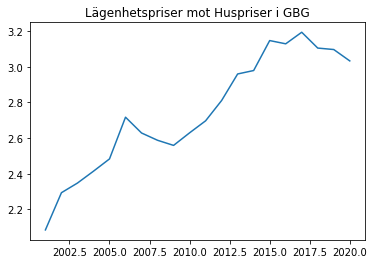

In [135]:
plt.plot(df['Ratio']);
plt.title( 'Lägenhetspriser mot Huspriser i GBG');

Text(0.5, 1.0, 'Lägenhetspriser mot Huspriser i GBG')

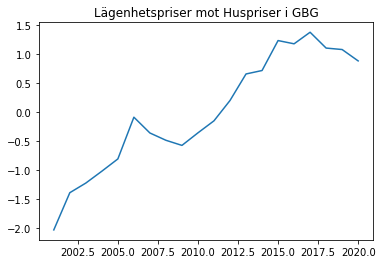

In [136]:
z_score = (df['Ratio'] - df['Ratio'].mean())/ df['Ratio'].std()
plt.plot(z_score);
plt.title( 'Lägenhetspriser mot Huspriser i GBG: Z-Score');

# Hirarkist index test

In [200]:
arrays = [np.array(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]),
np.array(["one", "two", "one", "two", "one", "two", "one", "two"]),]

In [201]:
s = pd.Series(np.random.randn(8), index=arrays)

In [202]:
df = pd.DataFrame(np.random.randn(8, 2), index=arrays)

In [203]:
df.index.name =['type','nmr']

In [204]:
df

0         1
bar one -2.201372  1.168260
    two -0.583211  0.546064
baz one  1.474538  2.005833
    two  0.204286 -0.386166
foo one  1.328430 -1.021157
    two  0.081059 -0.310443
qux one  0.015387  0.161061
    two  1.441687  0.025270

In [381]:
df.loc['baz']

,0,1
one,1.474538,2.005833
two,0.204286,-0.386166


In [469]:
df2 = pd.DataFrame([['1', 'AA', 1, 2], ['1', 'BB', 2, 4], ['2', 'AA', 2, 6],
                   ['2', 'BB', 1, 8], ['3', 'AA', 1, 10], ['3', 'BB', 1, 12]])

In [470]:
df2.columns =['day', 'symbol', 'var1', 'var2']

In [471]:
df2

,day,symbol,var1,var2
0,1,AA,1,2
1,1,BB,2,4
2,2,AA,2,6
3,2,BB,1,8
4,3,AA,1,10
5,3,BB,1,12


In [472]:
#df2 = df2.set_index([0, 1])
df2 = df2.set_index(['day', 'symbol'])

In [473]:
df2['ret'] = df2.groupby(['symbol']).var1.pct_change(1)

In [474]:
df2

var1  var2  ret
day symbol                 
1   AA         1     2  NaN
    BB         2     4  NaN
2   AA         2     6  1.0
    BB         1     8 -0.5
3   AA         1    10 -0.5
    BB         1    12  0.0

In [475]:
df2 = df2.dropna()

In [476]:
df2

var1  var2  ret
day symbol                 
2   AA         2     6  1.0
    BB         1     8 -0.5
3   AA         1    10 -0.5
    BB         1    12  0.0

In [481]:

df2['rank']=df2.groupby(['day']).var1.rank(ascending=True)
#df2.loc[:,'rank']=df2.groupby(['day']).var1.rank()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [482]:
df2

var1  var2  ret  rank
day symbol                       
2   AA         2     6  1.0   2.0
    BB         1     8 -0.5   1.0
3   AA         1    10 -0.5   1.5
    BB         1    12  0.0   1.5

In [435]:
df2['rank']

day  symbol
2    AA        2.0
     BB        1.0
3    AA        1.5
     BB        1.5
Name: rank, dtype: float64

In [446]:

###### TEST #######

df4 = df2.copy()

In [447]:
# drop var1 and var2 ,set symbol to column names and day and index
df4 =  df4.drop(columns=['var1', 'var2'])
df4 = df4.unstack()

In [448]:
df4

ret      rank     
symbol   AA   BB   AA   BB
day                       
2       1.0 -0.5  2.0  1.0
3      -0.5  0.0  1.5  1.5

In [449]:
ret = df4['ret']
rank= df4['rank']

In [363]:
list(ret.columns) == list(rank.columns) #order sensitive

True